# Data Preprocessing for Simulated Data

---

Steps
1. Load data
2. Data prep/analysis
    - 2.1 Add labels to data
    - 2.2 Check for missing values
    - 2.3 Check for duplicate values
    - 2.4 Evaluate pie chart of data class balance
    - 2.5 One-hot encoding of categorical variables
    - 2.6 Create train and test sets
    - 2.7 Label one-hot encoding
    - 2.8 Normalize data
3. Export data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from functions import * #custom functions
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

## 1. Load Data
---

In [4]:
normal = pd.read_csv(f'data/wshark_norm.csv', delimiter = ",")
dos = pd.read_csv(f'data/wshark_dos.csv', delimiter = ",")
merged = pd.read_csv(f'data/merged.csv', delimiter = ",")

In [5]:
normal

,No.,Time,Source Port,Destination Port,Protocol,Length,Time to Live,Sequence Number (raw),Calculated window size,Total Length,Flags,Next Sequence Number,Frame Number,Acknowledgment number (raw)
0,1,0.000000,56069,443,TLSv1.2,271,128,944798163,514,257,0x40,218,1,2723284736
1,2,0.032784,443,56069,TLSv1.2,249,227,2723284736,23,235,0x40,196,2,944798380
2,3,0.087226,56069,443,TCP,54,128,944798380,514,40,0x40,218,3,2723284931
3,4,2.382655,62971,443,TLSv1.2,137,128,104831187,512,123,0x40,84,4,1015133480
4,5,2.405408,443,62971,TCP,60,56,1015133480,270,40,0x00,1,5,104831270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2043,138.695105,62989,443,TLSv1.2,93,128,786744437,516,79,0x40,155893,2043,1225898234
2043,2044,138.723092,443,62989,TCP,60,56,1225898234,3684,40,0x00,12085,2044,786744476
2044,2045,139.225585,63003,443,TCP,55,128,2233315490,514,41,0x40,780,2045,1196413640
2045,2046,139.247415,443,63003,TCP,66,106,1196413640,494,52,0x00,311,2046,2233315491


In [6]:
dos

,No.,Time,Source Port,Destination Port,Protocol,Length,Time to Live,Sequence Number (raw),Calculated window size,Total Length,Flags,Next Sequence Number,Frame Number,Acknowledgment number (raw)
0,1,0.0000,43273,54676,TCP,527,193,1890204976,512,513,0x00,474,1,949441561
1,2,0.0000,43274,54676,TCP,527,193,1943762715,512,513,0x00,474,2,1298712841
2,3,0.0000,43275,54676,TCP,527,193,1155920751,512,513,0x00,474,3,1422991295
3,4,0.0000,60954,54682,TCP,1070,139,1786670867,512,1056,0x00,1017,4,313425668
4,5,0.0000,60955,54682,TCP,1070,139,249138939,512,1056,0x00,1017,5,1832519770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,897,0.0101,43330,54676,TCP,527,193,2090893118,512,513,0x00,474,897,218234718
897,898,0.0101,43331,54676,TCP,527,193,218544318,512,513,0x00,474,898,877316256
898,899,0.0101,43332,54676,TCP,527,193,1752956111,512,513,0x00,474,899,605204384
899,900,0.0101,60982,54682,TCP,1070,139,1870939604,512,1056,0x00,1017,900,1426365054


In [7]:
merged

,No.,Time,Source Port,Destination Port,Protocol,Length,Time to Live,Sequence Number (raw),Calculated window size,Total Length,Flags,Next Sequence Number,Frame Number,Acknowledgment number (raw)
0,1,0.000000,56069,443,TLSv1.2,271,128,944798163,514,257,0x40,218,1,2723284736
1,2,0.032784,443,56069,TLSv1.2,249,227,2723284736,23,235,0x40,196,2,944798380
2,3,0.087226,56069,443,TCP,54,128,944798380,514,40,0x40,218,3,2723284931
3,4,2.382655,62971,443,TLSv1.2,137,128,104831187,512,123,0x40,84,4,1015133480
4,5,2.405408,443,62971,TCP,60,56,1015133480,270,40,0x00,1,5,104831270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,2944,764610.658696,43330,54676,TCP,527,193,2090893118,512,513,0x00,474,2944,218234718
2944,2945,764610.658696,43331,54676,TCP,527,193,218544318,512,513,0x00,474,2945,877316256
2945,2946,764610.658696,43332,54676,TCP,527,193,1752956111,512,513,0x00,474,2946,605204384
2946,2947,764610.658696,60982,54682,TCP,1070,139,1870939604,512,1056,0x00,1017,2947,1426365054


## 2. Data Prep/Analysis
---

### 2.1 Add labels to data

In [8]:
merged.loc[0:2046,'Label'] = 0
merged.loc[2047: 2947, 'Label'] = 1

In [9]:
merged

,No.,Time,Source Port,Destination Port,Protocol,Length,Time to Live,Sequence Number (raw),Calculated window size,Total Length,Flags,Next Sequence Number,Frame Number,Acknowledgment number (raw),Label
0,1,0.000000,56069,443,TLSv1.2,271,128,944798163,514,257,0x40,218,1,2723284736,0.0
1,2,0.032784,443,56069,TLSv1.2,249,227,2723284736,23,235,0x40,196,2,944798380,0.0
2,3,0.087226,56069,443,TCP,54,128,944798380,514,40,0x40,218,3,2723284931,0.0
3,4,2.382655,62971,443,TLSv1.2,137,128,104831187,512,123,0x40,84,4,1015133480,0.0
4,5,2.405408,443,62971,TCP,60,56,1015133480,270,40,0x00,1,5,104831270,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,2944,764610.658696,43330,54676,TCP,527,193,2090893118,512,513,0x00,474,2944,218234718,1.0
2944,2945,764610.658696,43331,54676,TCP,527,193,218544318,512,513,0x00,474,2945,877316256,1.0
2945,2946,764610.658696,43332,54676,TCP,527,193,1752956111,512,513,0x00,474,2946,605204384,1.0
2946,2947,764610.658696,60982,54682,TCP,1070,139,1870939604,512,1056,0x00,1017,2947,1426365054,1.0


In [10]:
data = merged
print('Number of data samples: ', len(data))

Number of data samples:  2948


### 2.2 Check for missing values

In [11]:
#Check which columns have missing values
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()

if len(columns_with_nan) != 0:
    print('Amount of null values in columns:')
    for col in columns_with_nan:
        print(f'\t{col}: {data[col].isna().sum()}')
else:
    print('No missing values in data')

No missing values in data


### 2.3 Check for duplicate values

In [12]:
print('Check for duplicated values: \n', data.duplicated().value_counts())

Check for duplicated values: 
 False    2948
dtype: int64


### 2.4 Evaluate pie chart of data class balance

In [14]:
#Prepare data for pie chart
class_counts = data['Label'].value_counts()
class_counts

0.0    2047
1.0     901
Name: Label, dtype: int64

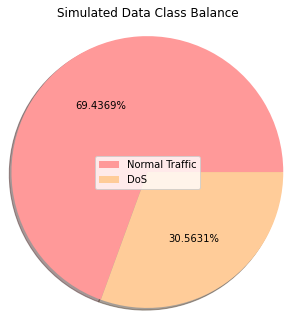

In [15]:
colors = ['#ff9999','#ffcc99']
plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.4f%%', radius=1.25, colors=colors, shadow=True)
plt.legend(labels=['Normal Traffic', 'DoS'], loc='center')
plt.title('Simulated Data Class Balance', y=1.05)
plt.savefig('img/data/sim_data_class_balance')

### 2.5 One-hot encoding of categorical variables

In [16]:
#one hot encoding categorical columns: proto
proto = pd.get_dummies(data["Protocol"],prefix='proto')
flags = pd.get_dummies(data["Flags"],prefix='flags')

data = data.merge(proto, how='outer', left_index=True, right_index=True)
data = data.merge(flags, how='outer', left_index=True, right_index=True)

In [17]:
data = data.drop(columns=['Protocol', 'Flags', 'No.', 'Time','Frame Number']) #Remove the original versions of the categorical cols
data

,Source Port,Destination Port,Length,Time to Live,Sequence Number (raw),Calculated window size,Total Length,Next Sequence Number,Acknowledgment number (raw),Label,proto_FTP,proto_SSH,proto_TCP,proto_TELNET,proto_TIME,proto_TLSv1.2,proto_TLSv1.3,flags_0x00,flags_0x40
0,56069,443,271,128,944798163,514,257,218,2723284736,0.0,0,0,0,0,0,1,0,0,1
1,443,56069,249,227,2723284736,23,235,196,944798380,0.0,0,0,0,0,0,1,0,0,1
2,56069,443,54,128,944798380,514,40,218,2723284931,0.0,0,0,1,0,0,0,0,0,1
3,62971,443,137,128,104831187,512,123,84,1015133480,0.0,0,0,0,0,0,1,0,0,1
4,443,62971,60,56,1015133480,270,40,1,104831270,0.0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,43330,54676,527,193,2090893118,512,513,474,218234718,1.0,0,0,1,0,0,0,0,1,0
2944,43331,54676,527,193,218544318,512,513,474,877316256,1.0,0,0,1,0,0,0,0,1,0
2945,43332,54676,527,193,1752956111,512,513,474,605204384,1.0,0,0,1,0,0,0,0,1,0
2946,60982,54682,1070,139,1870939604,512,1056,1017,1426365054,1.0,0,0,1,0,0,0,0,1,0


In [18]:
print(data.columns)

Index(['Source Port', 'Destination Port', 'Length', 'Time to Live',
       'Sequence Number (raw)', 'Calculated window size', 'Total Length',
       'Next Sequence Number', 'Acknowledgment number (raw)', 'Label',
       'proto_FTP', 'proto_SSH', 'proto_TCP', 'proto_TELNET', 'proto_TIME',
       'proto_TLSv1.2', 'proto_TLSv1.3', 'flags_0x00', 'flags_0x40'],
      dtype='object')


In [19]:
data

,Source Port,Destination Port,Length,Time to Live,Sequence Number (raw),Calculated window size,Total Length,Next Sequence Number,Acknowledgment number (raw),Label,proto_FTP,proto_SSH,proto_TCP,proto_TELNET,proto_TIME,proto_TLSv1.2,proto_TLSv1.3,flags_0x00,flags_0x40
0,56069,443,271,128,944798163,514,257,218,2723284736,0.0,0,0,0,0,0,1,0,0,1
1,443,56069,249,227,2723284736,23,235,196,944798380,0.0,0,0,0,0,0,1,0,0,1
2,56069,443,54,128,944798380,514,40,218,2723284931,0.0,0,0,1,0,0,0,0,0,1
3,62971,443,137,128,104831187,512,123,84,1015133480,0.0,0,0,0,0,0,1,0,0,1
4,443,62971,60,56,1015133480,270,40,1,104831270,0.0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,43330,54676,527,193,2090893118,512,513,474,218234718,1.0,0,0,1,0,0,0,0,1,0
2944,43331,54676,527,193,218544318,512,513,474,877316256,1.0,0,0,1,0,0,0,0,1,0
2945,43332,54676,527,193,1752956111,512,513,474,605204384,1.0,0,0,1,0,0,0,0,1,0
2946,60982,54682,1070,139,1870939604,512,1056,1017,1426365054,1.0,0,0,1,0,0,0,0,1,0


### 2.6 Create train and test sets

In [23]:
#Separate data from the labels in the pandas dataframe into their own numpy arrays
x, y = features_labels_split(data, 'Label')

print(x.shape)
print(y.shape)

(2948, 18)
(2948,)


In [25]:
#Separate data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, shuffle=True)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)

x_train shape:  (2063, 18)
y_train shape:  (2063,)
x_test shape:  (442, 18)
y_test shape:  (442,)
x_val shape:  (443, 18)
y_val shape:  (443,)


### 2.7 Label one-hot encoding

In [39]:
#Label one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print('y_train one-hot shape: ', y_train.shape)
print('y_val one-hot shape: ', y_val.shape)
print('y_test one-hot shape: ', y_test.shape)

y_train one-hot shape:  (2063, 2)
y_val one-hot shape:  (443, 2)
y_test one-hot shape:  (442, 2)


### 2.8 Normalize data

In [40]:
#Normalize Data
scaler = MinMaxScaler() 

x_train = scaler.fit_transform(x_train) 
x_val = scaler.transform(x_val) 
x_test = scaler.transform(x_test)

## Export Data
---

In [41]:
#Export data
np.savez('data/data_sim.npz', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, x_val=x_val, y_val=y_val)